# Previous notebook was getting chaotic, new one with everything already cleaned

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import os
import re
import pickle
from IPython.display import clear_output
from scipy.stats import linregress

In [2]:
funded_R01_projects = pd.DataFrame()
for root, dirs, files in os.walk("data/funded_R01_projects_category_dfs/cleaned/", topdown=True):
    for file in files:
        df = pd.read_csv(os.path.join(root, file))
        funded_R01_projects = funded_R01_projects.append(df)

/Users/maheshrao/anaconda3/envs/capstone/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,11,12,15,19,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/maheshrao/anaconda3/envs/capstone/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,11,12,15,17,19,24,26,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
nih_budget = pd.read_csv("data/nih_budget_full.csv")
brdpi = pd.read_excel("data/BRDPI Table FY 1950 to 2023_Jan 2018_Rev.xlsx", skiprows = [0, 1, 2], skip_footer = 10)
inflation = pd.read_excel("data/SeriesReport-20180718142529_be797a.xlsx", skiprows=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12])

/Users/maheshrao/anaconda3/envs/capstone/lib/python3.6/site-packages/pandas/util/_decorators.py:178: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


In [107]:
nih_budget_actual_percentages = [100]
counter = 1
annual_budgets = nih_budget.loc[nih_budget.FY >= 1950].Total.tolist()
l = len(annual_budgets)-1
while counter <= l:
    pct_inc = annual_budgets[counter]/annual_budgets[counter-1]
    overall_pct_inc = pct_inc + nih_budget_actual_percentages[-1]
    nih_budget_actual_percentages.append(overall_pct_inc)
    counter += 1

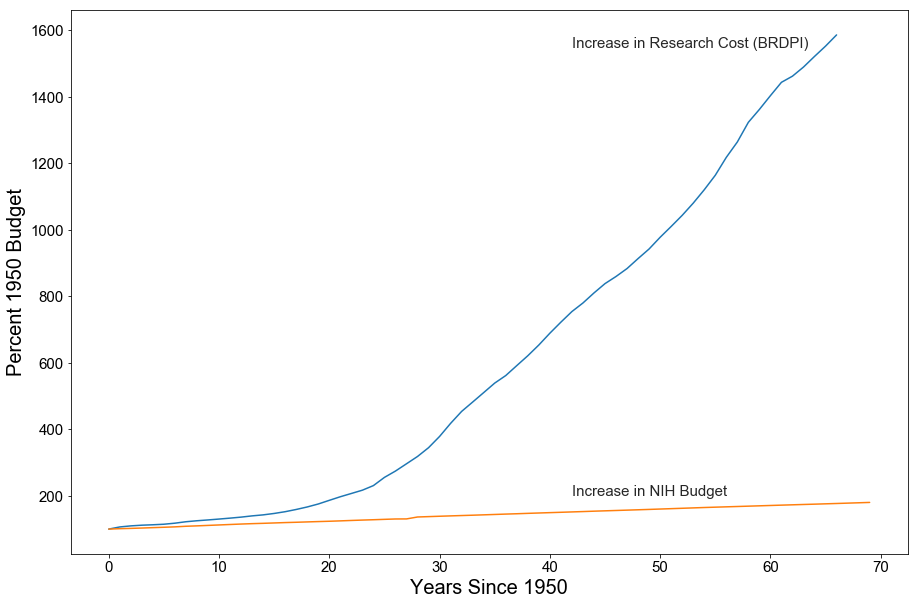

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_style("darkgrid")
plt.plot(brdpi[1950][:-7])
plt.plot(nih_budget_actual_percentages)
plt.xlabel("Years Since 1950", size = 20)
plt.ylabel("Percent 1950 Budget", size = 20)
plt.text(s = "Increase in Research Cost (BRDPI)", x = 42, y = 1550, size = 15)
plt.text(s = "Increase in NIH Budget", x = 42, y = 200, size = 15)
ax.tick_params(axis='both', labelsize = 15)
plt.show();

In [6]:
R01s_per_year = funded_R01_projects.groupby("FY").count()

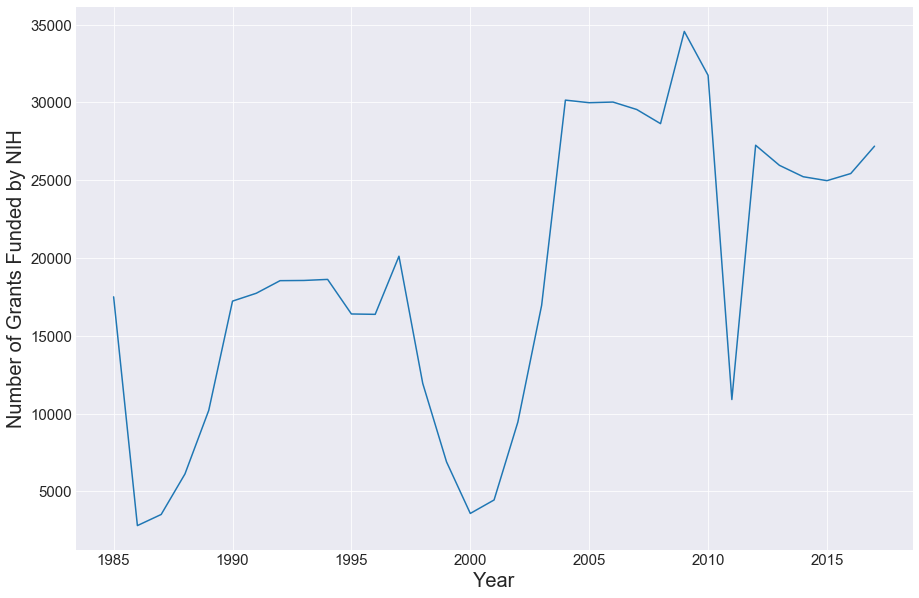

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_style("darkgrid")
plt.plot(R01s_per_year.loc[R01s_per_year.index != 2018.0]["grant_num"])
plt.xlabel("Year", size = 20)
plt.ylabel("Number of Grants Funded by NIH", size = 20)
ax.tick_params(axis='both', labelsize = 15)
plt.show();

In [8]:
years = []
categories = []
for year in np.sort(funded_R01_projects.FY.unique()):
    df_year = funded_R01_projects[funded_R01_projects.FY == year]
    num_categories = len(df_year.category.unique())
    categories.append(num_categories)
    years.append(year)

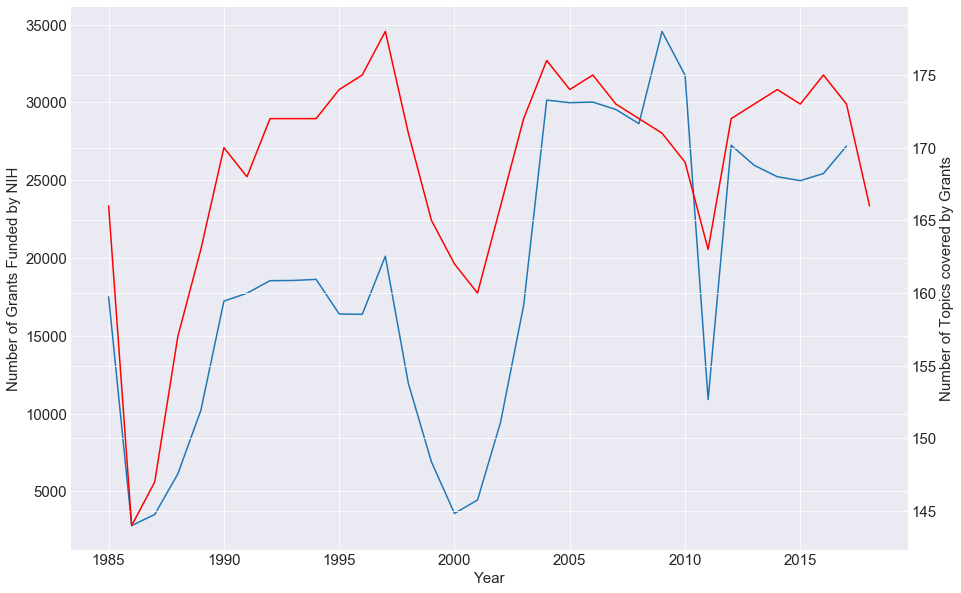

In [9]:
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
ax.plot(R01s_per_year.loc[R01s_per_year.index != 2018.0]["grant_num"])
ax2.plot(years, categories, color = "red")
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Number of Grants Funded by NIH', fontsize = 15)
ax2.set_ylabel('Number of Topics covered by Grants', fontsize = 15)
ax.tick_params(axis='both', labelsize = 15)
ax2.tick_params(labelsize = 15);

In [10]:
nih_budget_1985 = nih_budget[nih_budget.FY >= 1985]
nih_budget_1985.reset_index(drop = True, inplace = True)
nih_budget_1985_totals = nih_budget_1985.Total.tolist()

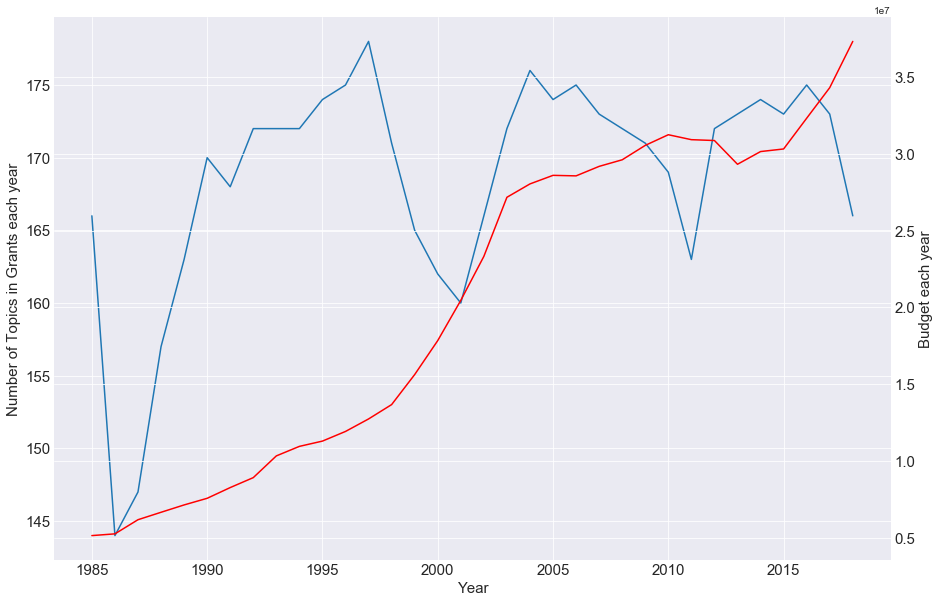

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
ax.plot(years, categories)
ax2.plot(years, nih_budget_1985_totals, color = "red")
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Number of Topics in Grants each year', fontsize = 15)
ax2.set_ylabel('Budget each year', fontsize = 15)
ax.tick_params(axis='both', labelsize = 15)
ax2.tick_params(labelsize = 15);

In [12]:
funded_R01_projects["ic_code"] = funded_R01_projects.grant_num.str.extract(r"([A-Z]{2})")

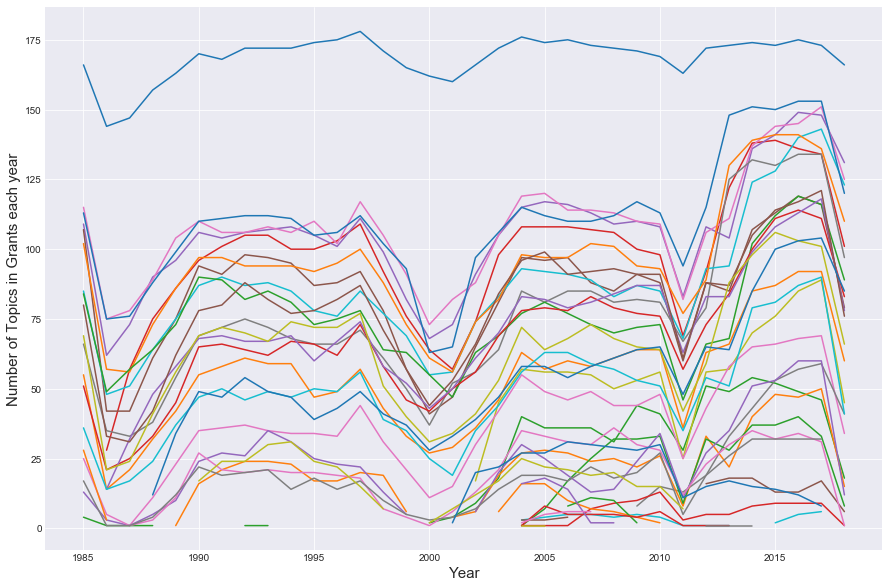

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(years, categories)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Number of Topics in Grants each year', fontsize = 15)
for institute in funded_R01_projects["ic_code"].unique():
    df = funded_R01_projects[funded_R01_projects.ic_code == institute]
    funding_years = df.FY.unique()
    categories_institute = []
    for year in years:
        if year in funding_years:
            df_year = df[df.FY == year]
            num_categories = len(df_year.category.unique())
            categories_institute.append(num_categories)
        else:
            categories_institute.append(np.nan)
    ax.plot(years, categories_institute);

In [14]:
inflation_per_year = inflation.Annual.tolist()[:-1]

In [15]:
nih_budget_in_1985 = nih_budget_1985.Total.iloc[0]

In [16]:
projected_budgets = [nih_budget_in_1985]
for i in inflation_per_year:
    projected_budgets.append(projected_budgets[-1] * i)

Text(2005,1e+08,'NIH Budget')

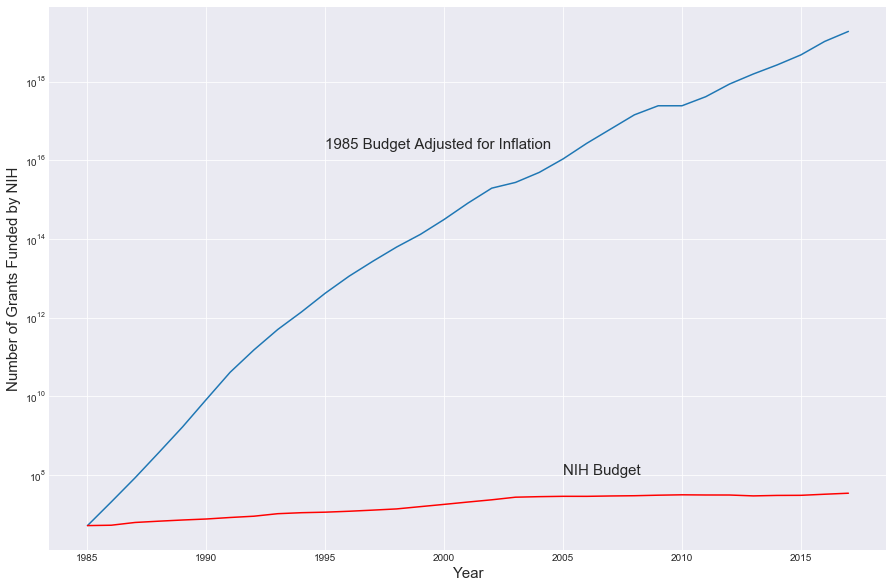

In [37]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(years[:-1], projected_budgets)
plt.plot(years[:-1], nih_budget_1985_totals[:-1], color = "red")
plt.yscale("log")
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of Grants Funded by NIH', fontsize = 15)
plt.text(s = "1985 Budget Adjusted for Inflation", x = 1995, y = 10**16.3, size = 15)
plt.text(s = "NIH Budget", x = 2005, y = 10**8, size = 15)
#ax.tick_params(axis='both', labelsize = 15);

In [66]:
#plt.plot(brdpi[1950][:-7])
brdpi["Year"] = brdpi["Year"].astype(str).str.strip().str.replace(r"[pr]","").astype(int)

In [73]:
brdpi_1985 = brdpi[(brdpi.Year >= 1985) & (brdpi.Year <= 2017)][1985].tolist()

Text(2005,205,'Brdpi Projected from 1985')

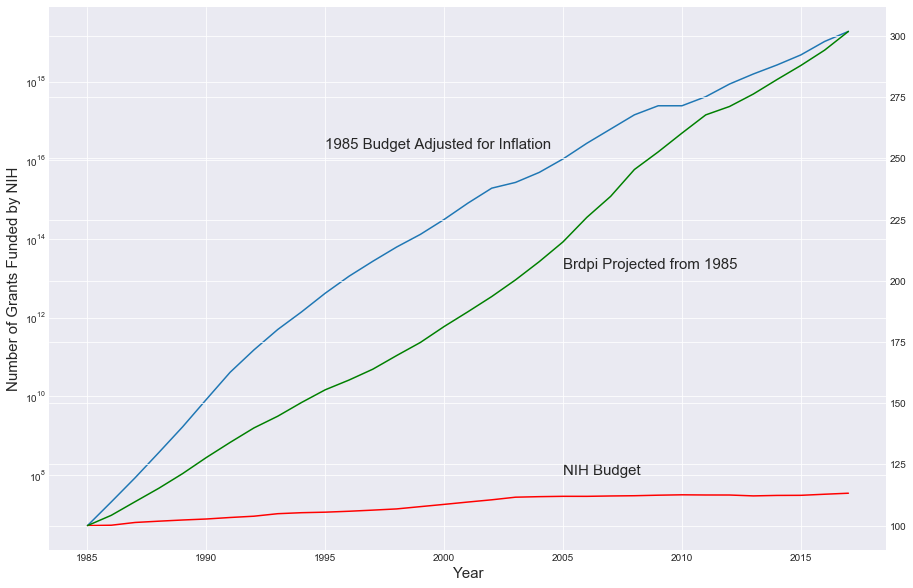

In [88]:
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
ax.plot(years[:-1], projected_budgets)
ax.plot(years[:-1], nih_budget_1985_totals[:-1], color = "red")
ax.set_yscale("log")
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Number of Grants Funded by NIH', fontsize = 15)
ax2.plot(years[:-1], brdpi_1985, color = "green")
ax2.set_ylabel("Brdpi percent increase from 1985")
ax.text(s = "1985 Budget Adjusted for Inflation", x = 1995, y = 10**16.3, size = 15)
ax.text(s = "NIH Budget", x = 2005, y = 10**8, size = 15)
ax2.text(s = "Brdpi Projected from 1985", x = 2005, y = 205, size = 15)
#ax.tick_params(axis='both', labelsize = 15);

In [94]:
# Try to get it on the same scale, percentages may be making it strange

brdpi_1985_dollars = [nih_budget_in_1985 * (pct/100) for pct in brdpi_1985]

Text(2005,1e+08,'NIH Budget')

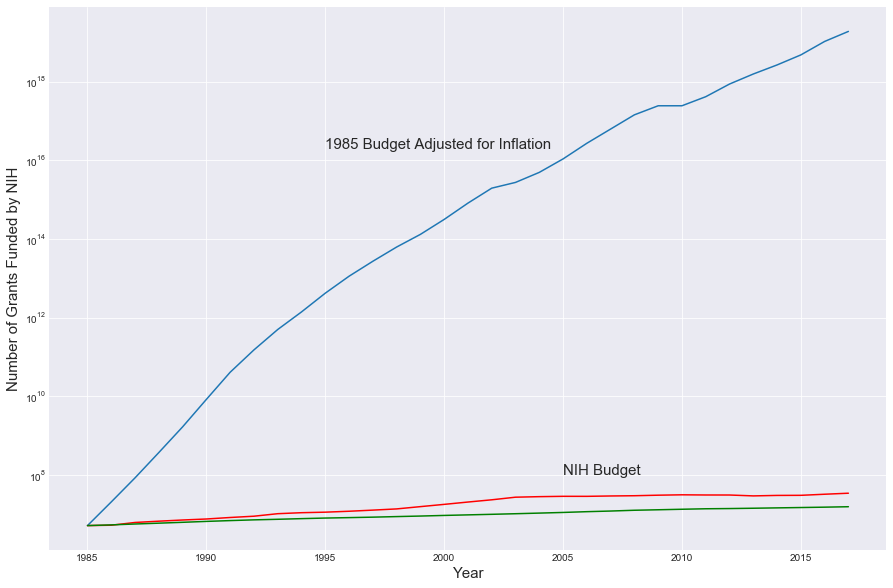

In [98]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(years[:-1], projected_budgets)
plt.plot(years[:-1], nih_budget_1985_totals[:-1], color = "red")
plt.plot(years[:-1], brdpi_1985_dollars, color = "green")
plt.yscale("log")
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of Grants Funded by NIH', fontsize = 15)
ax.text(s = "1985 Budget Adjusted for Inflation", x = 1995, y = 10**16.3, size = 15)
ax.text(s = "NIH Budget", x = 2005, y = 10**8, size = 15)

In [100]:
brdpi

,Year,Annual Change,1950,1951,1952,1953,1954,1955,1956,1957,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,1950,NaN,100.000000,93.946261,91.200503,89.512647,88.502592,87.251954,84.903452,81.884876,...,7.555478,7.340579,7.123940,6.925793,6.838196,6.712471,6.571255,6.440260,6.303228,6.143408
1,1951,0.064438,106.443832,100.000000,97.077310,95.280691,94.205550,92.874324,90.374488,87.161400,...,8.042341,7.813594,7.582995,7.582995,7.278838,7.145012,6.994696,6.855260,6.709398,6.539279
2,1952,0.030107,109.648518,103.010683,100.000000,98.149291,97.041781,95.670475,93.095377,89.785553,...,8.284470,8.048836,7.811295,7.811295,7.497981,7.360126,7.205284,7.061650,6.911396,6.736156
3,1953,0.018856,111.716058,104.953059,101.885607,100.000000,98.871607,97.474444,94.850790,91.478555,...,8.440682,8.200606,7.958585,7.958585,7.639363,7.498909,7.341147,7.194805,7.041718,6.863173
4,1954,0.011413,112.991041,106.150858,103.048397,101.141271,100.000000,98.586891,95.933294,92.522573,...,8.537014,8.294197,8.049414,8.049414,7.726549,7.584491,7.424930,7.276917,7.122083,6.941501
5,1955,0.014334,114.610613,107.672386,104.525456,102.590993,101.433364,100.000000,97.308367,93.848758,...,8.659380,8.413083,8.164792,8.164792,7.837298,7.693205,7.531356,7.381222,7.224168,7.040998
6,1956,0.027661,117.780841,110.650696,107.416719,105.428748,104.239097,102.766085,100.000000,96.444695,...,8.898906,8.645796,8.390637,8.390637,8.054085,7.906005,7.739680,7.585393,7.423995,7.235758
7,1957,0.036864,122.122674,114.729686,111.376493,109.315238,108.081732,106.554420,103.686366,100.000000,...,9.226952,8.964512,8.699946,8.699946,8.350988,8.197450,8.024993,7.865018,7.697671,7.502494
8,1958,0.024266,125.086147,117.513758,114.079195,111.967921,110.704483,109.140108,106.202458,102.426637,...,9.450857,9.182048,8.911062,8.911062,8.553636,8.396372,8.219730,8.055874,7.884465,7.684553
9,1959,0.019559,127.532736,119.812237,116.310497,114.157927,112.869777,111.274805,108.279696,104.430023,...,9.635708,9.361642,9.085356,9.085356,8.720939,8.560599,8.380502,8.213440,8.038679,7.834856


In [103]:
list(zip([(pct/100) for pct in brdpi_1985], brdpi_1985_dollars))

[(1.0, 5149459.0),
 (1.0419851016998292, 5365659.5598141),
 (1.0975178925424467, 5651623.389413735),
 (1.1525388615060939, 5934951.613232309),
 (1.2124261646196253, 6243338.825236011),
 (1.2782485763926086, 6582288.635942106),
 (1.3399326563588674, 6899928.276681077),
 (1.3990360555363508, 7204278.807506162),
 (1.4468396371477115, 7450441.391067017),
 (1.502846799501699, 7738847.977315219),
 (1.5549040896462736, 8006914.85856581),
 (1.594692179667836, 8211801.996820155),
 (1.639052282942785, 8440232.52987027),
 (1.6946253934056288, 8726403.983701156),
 (1.748279138111925, 9002691.742262695),
 (1.8134291318405855, 9338178.96381869),
 (1.873720321499333, 9648645.973027634),
 (1.9357819693675404, 9968229.884197405),
 (2.0038263603154047, 10318621.685563404),
 (2.0784813713923587, 10703054.604248723),
 (2.1593435976034883, 11119451.322771661),
 (2.259309304129473, 11634220.629933253),
 (2.34502933597709, 12075632.41941125),
 (2.4547981972626407, 12640882.67007788),
 (2.5266635801322015, 13

In [108]:
nih_budget_actual_percentages_2 = []
annual_budgets = nih_budget.loc[nih_budget.FY >= 1950].Total.tolist()
for i in list(range(len(annual_budgets))):
    pct_inc = (annual_budgets[i]/annual_budgets[0])*100
    nih_budget_actual_percentages_2.append(pct_inc)

In [110]:
nih_budget_actual_percentages_2

[100.0,
 122.84212922563268,
 107.99408126873315,
 111.18488447091855,
 134.3077740258755,
 153.9458208445574,
 186.87445460409,
 337.3221535076071,
 399.17858633380126,
 553.5853852866412,
 757.635542740069,
 1045.3067496300794,
 1404.1924346473422,
 1669.8429259779186,
 1645.424365443715,
 1819.5526805023335,
 2087.716735592063,
 1924.0695071518005,
 2042.0780058428502,
 2105.2414918238037,
 2012.7613157794895,
 2300.806237432181,
 2857.221990363091,
 3343.6373638881514,
 3396.4885988541946,
 3970.2868308229313,
 4367.200364229616,
 832.9988238418637,
 4825.165990059567,
 5393.132754107069,
 6051.477785787457,
 6504.789998861783,
 6771.267594946315,
 6908.743407823348,
 7633.586902910042,
 8524.46788329476,
 9768.67435595857,
 9982.568198201616,
 11729.16113366468,
 12646.911636377434,
 13553.828205030923,
 14372.561368896308,
 15697.421937246272,
 16924.70121789278,
 19607.686762529876,
 20783.440831657623,
 21435.52376977653,
 22626.93402132261,
 24169.751868573814,
 25941.57719012

In [112]:
list(zip(nih_budget_actual_percentages, nih_budget_1985_totals))

[(100, 5149459.0),
 (101.22842129225633, 5262211.0),
 (102.10755031704205, 6182910.0),
 (103.13709641035291, 6666693.0),
 (104.34506433391545, 7144765.0),
 (105.49128108838939, 7576352.0),
 (106.70517863740295, 8274739.0),
 (108.51025228549602, 8921687.0),
 (109.6936272348819, 10335996.0),
 (111.08043856254095, 10955783.0),
 (112.44903600545894, 11299522.0),
 (113.82873203430364, 11927562.0),
 (115.17206253048982, 12740843.0),
 (116.36124635229078, 13674843.0),
 (117.34662308434484, 15629156.0),
 (118.45244886322327, 17840587.0),
 (119.59982797346464, 20458556.0),
 (120.52144223001088, 23321382.0),
 (121.58277499280995, 27166715.0),
 (122.61370597869796, 28036627.0),
 (123.5697774429915, 28594357.0),
 (124.71288677214767, 28560417.0),
 (125.95472189232359, 29178504.0),
 (127.12496255796513, 29607070.0),
 (128.14076906722863, 30545098.0),
 (129.30970772704404, 31238000.0),
 (130.4096787241834, 30916345.0),
 (130.60041850124165, 30860913.0),
 (136.39294287457207, 29315822.0),
 (137.51065

In [115]:
test = [(i/5149459.0)*100 for i in nih_budget_1985_totals]

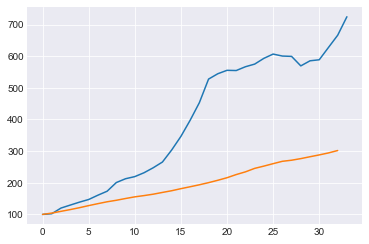

In [117]:
plt.plot(test)
plt.plot(brdpi_1985);

In [120]:
list(zip(brdpi_1985, test))

[(100.0, 100.0),
 (104.19851016998292, 102.18958923646153),
 (109.75178925424467, 120.06911794035062),
 (115.25388615060939, 129.46394951391983),
 (121.24261646196253, 138.74787623321208),
 (127.82485763926086, 147.12908676426008),
 (133.99326563588673, 160.69142408940434),
 (139.9036055536351, 173.25484094542747),
 (144.68396371477115, 200.72003680386618),
 (150.2846799501699, 212.75600019341837),
 (155.49040896462736, 219.43124510749576),
 (159.4692179667836, 231.6274777602851),
 (163.9052282942785, 247.42100092456317),
 (169.46253934056287, 265.55882860704395),
 (174.8279138111925, 303.51064063234605),
 (181.34291318405855, 346.4555597005433),
 (187.3720321499333, 397.29524985051825),
 (193.57819693675404, 452.8899443611455),
 (200.38263603154047, 527.5644490032836),
 (207.8481371392359, 544.457718762301),
 (215.93435976034883, 555.2885652648172),
 (225.93093041294733, 554.6294669012804),
 (234.502933597709, 566.6324171141084),
 (245.47981972626405, 574.9549612881664),
 (252.6663580

# I think I calculated brdpi/percent increase for budget incorrectly, for now, don't include

In [129]:
[funded_R01_projects[funded_R01_projects.FY == year].category.value_counts().head(10).index for year in years]

[Index(['Bioengineering', 'Genetics', 'Infectious Diseases', 'Pediatric',
        'Digestive Diseases', 'Pregnancy', 'Liver Disease', 'Infertility',
        'Basic Behavioral and Social Science', 'Epilepsy'],
       dtype='object'),
 Index(['Genetics', 'Bioengineering', 'Infectious Diseases', 'Pediatric',
        'Pregnancy', 'Epilepsy', 'Liver Disease', 'Digestive Diseases',
        'Infertility', 'Basic Behavioral and Social Science'],
       dtype='object'),
 Index(['Genetics', 'Bioengineering', 'Infectious Diseases', 'Pediatric',
        'Digestive Diseases', 'Pregnancy', 'Liver Disease', 'Epilepsy',
        'Infertility', 'Heart Disease - Coronary Heart Disease'],
       dtype='object'),
 Index(['Genetics', 'Bioengineering', 'Infectious Diseases',
        'Digestive Diseases', 'Pediatric', 'Pregnancy', 'Liver Disease',
        'Epilepsy', 'Infertility', 'Heart Disease - Coronary Heart Disease'],
       dtype='object'),
 Index(['Genetics', 'Bioengineering', 'Infectious Diseases', '

In [134]:
top_10_categories = funded_R01_projects.category.value_counts().head(10).index.tolist()

In [136]:
[len(funded_R01_projects[funded_R01_projects.category == cat]) for cat in top_10_categories]

[68869, 34929, 31003, 25395, 16818, 16506, 14458, 13507, 13009, 12211]

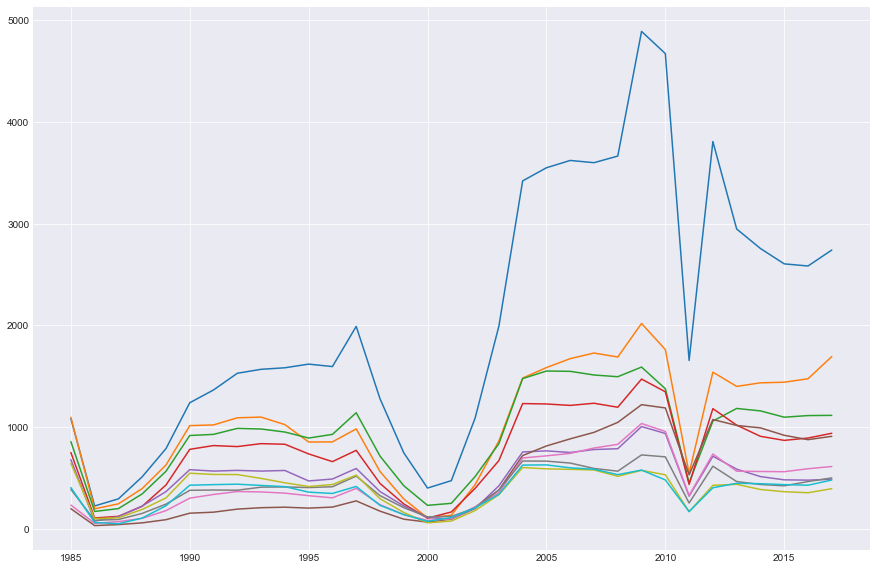

In [138]:
fig, ax = plt.subplots(figsize=(15, 10))
for cat in top_10_categories:
    df = funded_R01_projects[funded_R01_projects.category == cat]
    cats_per_year = df.groupby("FY").count()
    plt.plot(cats_per_year[cats_per_year.index != 2018.0]["grant_num"])

In [153]:
funded_R01_projects.category = funded_R01_projects.category.fillna("None")

In [158]:
disease_categories = funded_R01_projects[funded_R01_projects.category.str.contains("isease")]["category"].unique().tolist()

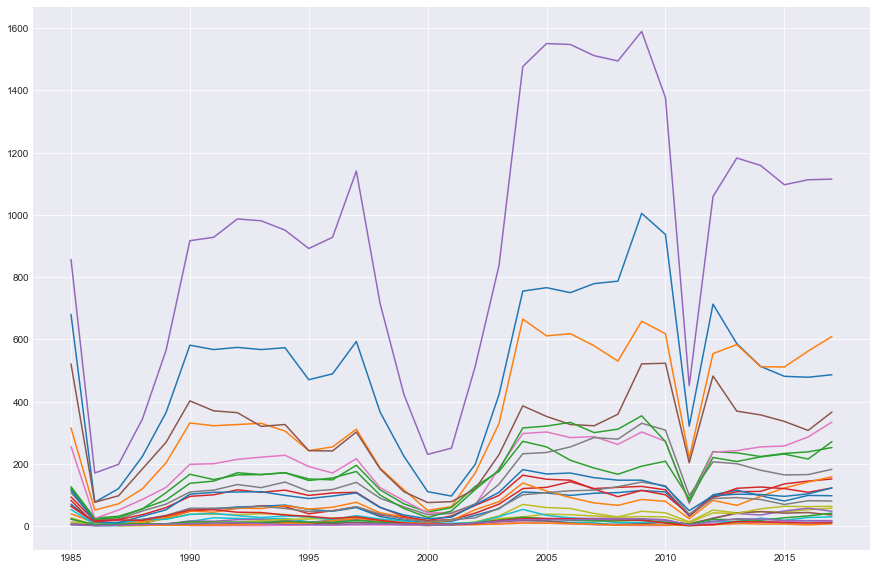

In [161]:
fig, ax = plt.subplots(figsize=(15, 10))
for cat in disease_categories:
    df = funded_R01_projects[funded_R01_projects.category == cat]
    cats_per_year = df.groupby("FY").count()
    plt.plot(cats_per_year[cats_per_year.index != 2018.0]["grant_num"])
#plt.yscale("log")

# Not sure this is going anywhere...
## Try incorporating success rate, see if can get something like amount of money available per number of grants submitted

In [162]:
success_rate_combined = pd.DataFrame()
for root, dirs, files in os.walk("data/original_data/Success_data", topdown=True):
    for file in files:
        df = pd.read_html(os.path.join(root, file), header = 0)[0]
        success_rate_combined = success_rate_combined.append(df)

In [165]:
R01_success_rate = success_rate_combined[success_rate_combined["Activity Code"] == "R01"]

In [213]:
R01_success_rate["success_rate"] = (R01_success_rate["Number of Applications Awarded"]/R01_success_rate["Number of Applications Reviewed"])*100

/Users/maheshrao/anaconda3/envs/capstone/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [214]:
R01_success_rate.head()

,Fiscal Year,Award Type,NIH Institute,Activity Code,Number of Applications Reviewed,Number of Applications Awarded,Award Amount,success_rate
1,2001,New,NCI,R01,2581.0,563.0,"$181,546,215",21.813251
10,2001,New,NHLBI,R01,2064.0,589.0,"$207,696,307",28.536822
18,2001,New,NIDCR,R01,297.0,80.0,"$23,772,345",26.936027
24,2001,New,NIDDK,R01,1442.0,308.0,"$97,926,567",21.359223
31,2001,New,NINDS,R01,1362.0,362.0,"$118,674,179",26.578561


# This story mainly stems from the feeling that its getting harder to get grants to do research. When I was going through grad school the stories about PIs who chose to leave the bench because they can't get funding are the ones that stuck in my head. This happened to one of the PIs I know. So why is there this general sense that grant funding is harder to come by? Can we see that grant money is actually decreasing, or that there is less to go around? When there is less to go around, what is the impact on the diversity of research? Are fewer research topics funded? Are certain institutions/PIs favored? Are new grants less likely to be funded?

In [215]:
new_R01_success_rate = R01_success_rate[R01_success_rate["Award Type"] == "New"].sort_values("Fiscal Year")

In [216]:
new_R01_success_rate

,Fiscal Year,Award Type,NIH Institute,Activity Code,Number of Applications Reviewed,Number of Applications Awarded,Award Amount,success_rate
196,1997,New,NIAID,R01,964.123474,299.123444,"$70,202,120",31.025429
94,1997,New,NIDCR,R01,179.000000,40.000000,"$11,806,626",22.346369
86,1997,New,NIDCD,R01,182.000000,35.000000,"$8,588,662",19.230769
212,1997,New,NCI,R01,2065.425293,404.425293,"$98,605,458",19.580727
221,1997,New,NIDA,R01,594.897949,163.897964,"$46,213,679",27.550602
205,1997,New,NIAMS,R01,361.603882,65.603889,"$15,635,478",18.142474
189,1997,New,NIA,R01,470.019836,113.019852,"$27,090,003",24.045762
100,1997,New,NIDDK,R01,1077.490234,265.490204,"$54,380,146",24.639685
107,1997,New,NIEHS,R01,367.718597,75.718597,"$18,111,623",20.591452
119,1997,New,NIGMS,R01,1266.278442,301.278442,"$58,885,341",23.792432


In [217]:
renew_R01_success_rate = R01_success_rate[R01_success_rate["Award Type"] == "Renewal"].sort_values("Fiscal Year")

In [218]:
supplement_R01_success_rate = R01_success_rate[R01_success_rate["Award Type"] == "Supplement"].sort_values("Fiscal Year")

In [177]:
overall_success_rate = pd.read_csv("data/success_rate/T218_Success_Rates_RPG_and_R01_Eq_1_clean.csv")

In [199]:
overall_success_rate["Number of R01 Equivalent Grants Applications Reviewed"] = overall_success_rate["Number of R01 Equivalent Grants Applications Reviewed"].str.replace("\t", "").str.replace(",", "").astype(int)

In [200]:
overall_success_rate["Number of R01 Equivalent Grants Applications Awarded"] = overall_success_rate["Number of R01 Equivalent Grants Applications Awarded"].str.replace("\t", "").str.replace(",", "").astype(int)

In [193]:
overall_success_rate["Success Rate R01 Equivalent Grants"] = overall_success_rate["Success Rate R01 Equivalent Grants"].str.replace("%", "").astype(float)

In [208]:
overall_success_rate.loc[overall_success_rate.FY >= 1985]["Success Rate R01 Equivalent Grants"]

15    32.7
16    32.3
17    35.1
18    31.6
19    27.9
20    24.0
21    28.6
22    29.0
23    23.0
24    24.7
25    26.2
26    27.4
27    30.2
28    30.9
29    32.1
30    32.0
31    31.7
32    30.7
33    30.2
34    25.4
35    22.7
36    20.7
37    23.6
38    23.3
39    22.0
40    22.3
41    18.7
42    18.3
43    17.5
44    18.8
45    18.9
46    20.0
47    19.3
Name: Success Rate R01 Equivalent Grants, dtype: float64

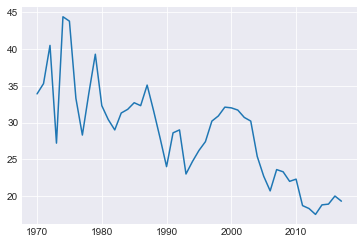

In [203]:
plt.plot(overall_success_rate.FY, overall_success_rate["Success Rate R01 Equivalent Grants"])

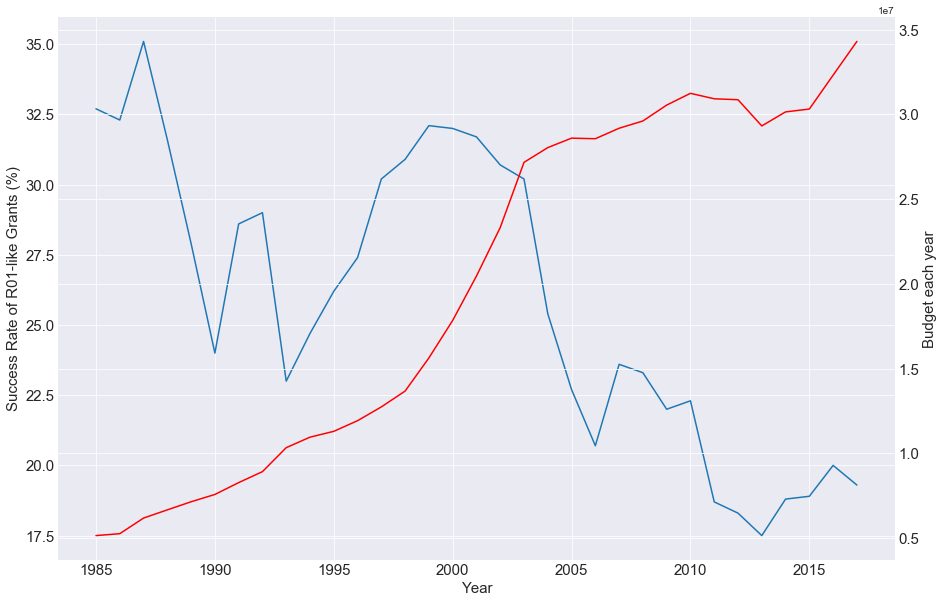

In [210]:
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
ax.plot(years[:-1], overall_success_rate.loc[overall_success_rate.FY >= 1985]["Success Rate R01 Equivalent Grants"])
ax2.plot(years[:-1], nih_budget_1985_totals[:-1], color = "red")
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Success Rate of R01-like Grants (%)', fontsize = 15)
ax2.set_ylabel('Budget each year', fontsize = 15)
ax.tick_params(axis='both', labelsize = 15)
ax2.tick_params(labelsize = 15);

In [220]:
new_R01_success_rate_count = new_R01_success_rate.groupby("Fiscal Year").sum()

In [222]:
new_R01_success_rate_count["success_rate"] = (new_R01_success_rate_count["Number of Applications Awarded"]/new_R01_success_rate_count["Number of Applications Reviewed"])*100

In [223]:
new_R01_success_rate_count

,Number of Applications Reviewed,Number of Applications Awarded,success_rate
Fiscal Year,,,
1997,12609.745245,2857.745159,22.662989
1998,13116.000000,3260.000000,24.855139
1999,16472.000000,4195.000000,25.467460
2000,16827.000000,4364.000000,25.934510
2001,16761.000000,4270.000000,25.475807
2002,16905.000000,4142.000000,24.501627
2003,18733.000000,4521.000000,24.133881
2004,21109.000000,4219.000000,19.986736
2005,21745.000000,3894.000000,17.907565


In [224]:
annual_success_rates = []
for df in [new_R01_success_rate, renew_R01_success_rate, supplement_R01_success_rate]:
    df_sum = df.groupby("Fiscal Year").sum()
    df_sum["success_rate"] = (df_sum["Number of Applications Awarded"]/df_sum["Number of Applications Reviewed"])*100
    annual_success_rates.append(df_sum.success_rate.tolist())

In [225]:
annual_success_rates

[[22.6629888518865,
  24.855138761817628,
  25.467459932005827,
  25.93451001366851,
  25.475806932760577,
  24.501626737651584,
  24.13388138578978,
  19.98673551565683,
  17.907564957461485,
  16.299440130034316,
  19.168926772568774,
  18.983626814952114,
  17.783594251567976,
  17.826265953067104,
  15.096437582859343,
  14.86382270568657,
  14.320106616224582,
  15.449487045731178,
  16.000325375198276,
  17.30247832894184,
  16.7323052007803],
 [46.31531359870936,
  47.498940228910556,
  51.657348242811494,
  49.769769769769766,
  50.77887922314383,
  49.060336300692384,
  48.34651329978433,
  42.14765100671141,
  36.89091480666457,
  33.468346834683466,
  36.14176900357531,
  34.354007186377125,
  34.900307991570756,
  38.0,
  33.47681471336333,
  34.60251046025105,
  31.441819386177965,
  34.63805706201368,
  33.730631704410015,
  35.60830860534125,
  36.829268292682926],
 [54.41176470588235,
  35.39823008849557,
  45.0,
  41.9753086419753,
  36.633663366336634,
  36.7924528301

In [227]:
success_rate_years = new_R01_success_rate_count.index.tolist()

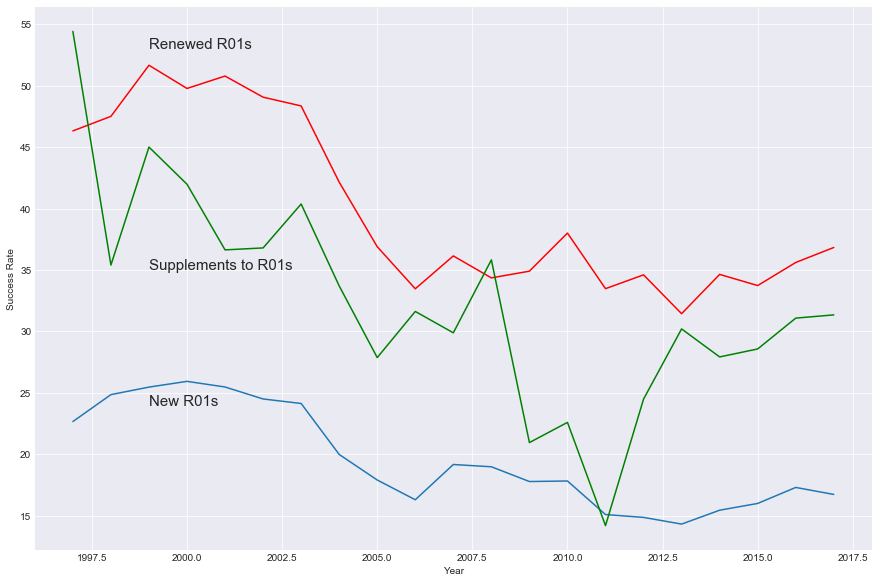

In [231]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(success_rate_years, annual_success_rates[0])
plt.plot(success_rate_years, annual_success_rates[1], color = "red")
plt.plot(success_rate_years, annual_success_rates[2], color = "green")
plt.ylabel("Success Rate")
plt.xlabel("Year")
plt.text(s = "New R01s", x = 1999, y = 24, size = 15)
plt.text(s = "Renewed R01s", x = 1999, y = 53, size = 15)
plt.text(s = "Supplements to R01s", x = 1999, y = 35, size = 15);

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
ax.plot(years, categories)
ax2.plot(years, nih_budget_1985_totals, color = "red")
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Number of Topics in Grants each year', fontsize = 15)
ax2.set_ylabel('Budget each year', fontsize = 15)
ax.tick_params(axis='both', labelsize = 15)
ax2.tick_params(labelsize = 15);

In [238]:
rows = {"years":years, "categories":categories, "budget_totals":nih_budget_1985_totals}

In [251]:
regression_df = pd.DataFrame(rows)

In [246]:
sequestration = ["pre"]*19 + ["post"]*15

In [252]:
regression_df["sequestration"] = sequestration

In [281]:
regression_df.drop(33, inplace = True)

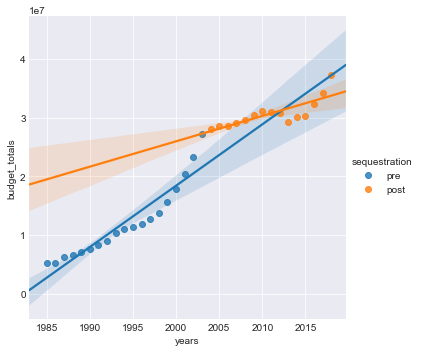

In [263]:
sns.lmplot(x="years", y="budget_totals", hue="sequestration", data=regression_df);

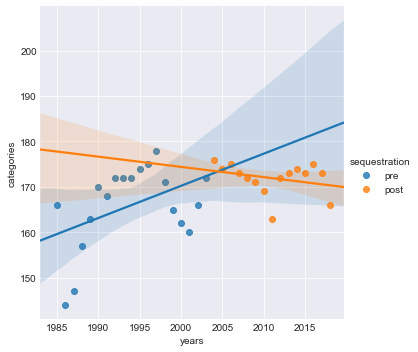

In [264]:
sns.lmplot(x="years", y="categories", hue="sequestration", data=regression_df);

In [278]:
success_rate = overall_success_rate.loc[overall_success_rate.FY >= 1985]["Success Rate R01 Equivalent Grants"].tolist()

In [280]:
len(success_rate)

33

In [282]:
regression_df["success_rate"] = success_rate

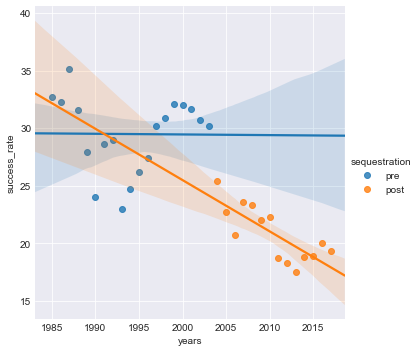

In [285]:
sns.lmplot(x="years", y="success_rate", hue="sequestration", data=regression_df);

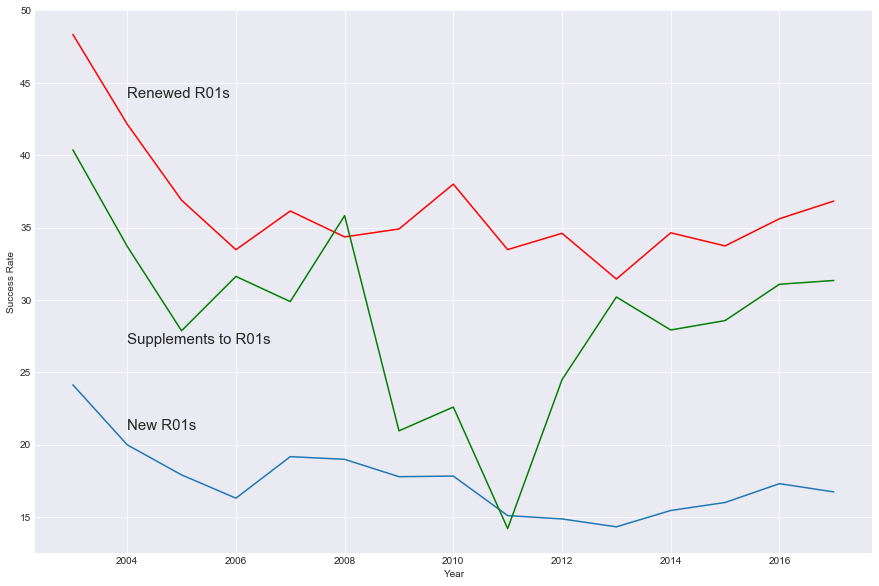

In [290]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(success_rate_years[6:], annual_success_rates[0][6:])
plt.plot(success_rate_years[6:], annual_success_rates[1][6:], color = "red")
plt.plot(success_rate_years[6:], annual_success_rates[2][6:], color = "green")
plt.ylabel("Success Rate")
plt.xlabel("Year")
plt.text(s = "New R01s", x = 2004, y = 21, size = 15)
plt.text(s = "Supplements to R01s", x = 2004, y = 27, size = 15)
plt.text(s = "Renewed R01s", x = 2004, y = 44, size = 15);

In [297]:
success_rate_df_status = pd.DataFrame()
annual_success_rates = []
for status, df in zip(["new", "renew", "supplement"], [new_R01_success_rate, renew_R01_success_rate, supplement_R01_success_rate]):
    df_sum = df.groupby("Fiscal Year").sum()
    df_sum["success_rate"] = (df_sum["Number of Applications Awarded"]/df_sum["Number of Applications Reviewed"])*100
    df_sum["status"] = status
    success_rate_df_status = success_rate_df_status.append(df_sum)
success_rate_df_status.reset_index(inplace = True)

In [298]:
success_rate_df_status

,Fiscal Year,Number of Applications Reviewed,Number of Applications Awarded,success_rate,status
0,1997,12609.745245,2857.745159,22.662989,new
1,1998,13116.000000,3260.000000,24.855139,new
2,1999,16472.000000,4195.000000,25.467460,new
3,2000,16827.000000,4364.000000,25.934510,new
4,2001,16761.000000,4270.000000,25.475807,new
5,2002,16905.000000,4142.000000,24.501627,new
6,2003,18733.000000,4521.000000,24.133881,new
7,2004,21109.000000,4219.000000,19.986736,new
8,2005,21745.000000,3894.000000,17.907565,new
9,2006,22148.000000,3610.000000,16.299440,new


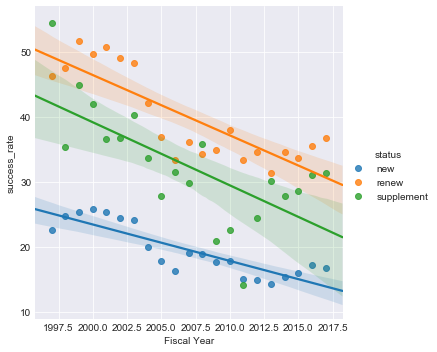

In [305]:
p = sns.lmplot(x="Fiscal Year", y="success_rate", hue="status", data=success_rate_df_status);

In [313]:
#slope, intercept, r_value, p_value, std_err = linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())

In [314]:
#dir(p)

In [315]:
categories_represented_per_year = []
for year in np.sort(funded_R01_projects.FY.unique()):
    df_year = funded_R01_projects[funded_R01_projects.FY == year]
    categories_represented = df_year.category.unique().tolist()
    categories_represented_per_year.append(categories_represented)

In [316]:
categories_represented_per_year

[['Neurosciences',
  'Alcoholism, Alcohol Use and Health',
  'Pediatric',
  'Substance Abuse',
  'Liver Disease',
  'Basic Behavioral and Social Science',
  'Chronic Liver Disease and Cirrhosis',
  'Digestive Diseases',
  'Depression',
  'Pregnancy',
  'Infertility',
  'Neurodegenerative',
  'Health Services',
  "Women's Health",
  'Violence Research',
  'Dementia',
  'Genetic Testing',
  'Dietary Supplements',
  'Rural Health',
  'Bioengineering',
  'ALS',
  'Heart Disease',
  'Sleep Research',
  'Genetics',
  'Pain Conditions - Chronic',
  'Comparative Effectiveness Research',
  'Clinical Research',
  'Major Depressive Disorder',
  'Rehabilitation',
  'Heart Disease - Coronary Heart Disease',
  'Epilepsy',
  'Cervical Cancer',
  'Aging',
  'Human Genome',
  'Prostate Cancer',
  'Cerebral Palsy',
  'Osteoporosis',
  'Emphysema',
  'Dental_Oral and Craniofacial Disease',
  'Regenerative Medicine',
  'Multiple Sclerosis',
  'Infectious Diseases',
  'Obesity',
  'Asthma',
  'Down Syndrom

In [337]:
gained_from_previous_year = []
dropped_from_previous_year = []
for y in list(range(len(years)-1)):
    gained_from_previous_year.append(np.setdiff1d(categories_represented_per_year[y+1], categories_represented_per_year[y]).tolist())
    dropped_from_previous_year.append(np.setdiff1d(categories_represented_per_year[y], categories_represented_per_year[y+1]).tolist())

In [339]:
dropped_from_previous_year

[['Acquired Cognitive Impairment',
  'Adolescent Sexual Activity',
  'Aphasia',
  'Ataxia Telangiectasia',
  'Back Pain',
  'Behavioral and Social Science',
  'Cachexia',
  'Congenital Structural Anomalies',
  'Cost Effectiveness Research',
  "Crohn's Disease",
  'Hepatitis - C',
  'Inflammatory Bowel Disease',
  'Interstitial Cystitis',
  'Otitis Media',
  'Perinatal Period - Conditions Originating in Perinatal Period',
  'Prevention',
  'Scleroderma',
  'Smoking and Health',
  'Spinal Muscular Atrophy',
  'Stem Cell Research',
  'Stem Cell Research - Umbilical Cord Blood_ Placenta - Human',
  'Teenage Pregnancy'],
 ['Brain Disorders',
  'Dystonia',
  'Homelessness',
  'Mind and Body',
  'Rare Diseases',
  'Youth Violence'],
 ['Childhood Leukemia', 'None'],
 [],
 [],
 ['Acquired Cognitive Impairment', 'Myotonic Dystrophy', 'Tuberous Sclerosis'],
 ['Injury - Childhood Injuries'],
 ['Ataxia Telangiectasia'],
 ['Polycystic Kidney Disease', 'Spinal Muscular Atrophy', 'Teenage Pregnancy'],

In [342]:
# split df into before and after 2003, 2003 goes with before
before_2003 = funded_R01_projects[funded_R01_projects.FY <= 2003]

after_2003 = funded_R01_projects[funded_R01_projects.FY > 2003]

In [345]:
#print(len(before_2003.category.unique()), len(after_2003.category.unique()))

[cat for cat in before_2003.category.unique() if cat not in after_2003.category.unique()]

# Fetal Alcohol Syndrome is not a topic in after_2003 df

['Fetal Alcohol Syndrome']

In [402]:
before_2003_category_counts = pd.DataFrame(before_2003.category.value_counts()).reset_index()
after_2003_category_counts = after_2003.category.value_counts()
after_2003_category_counts = pd.DataFrame(after_2003_category_counts.append(pd.Series(0, index=["Fetal Alcohol Syndrome"]))).reset_index()


In [403]:
after_2003_category_counts.columns = ["category", "count"]
after_2003_category_counts["label"] = "after"

In [404]:
before_2003_category_counts.columns = ["category", "count"]
before_2003_category_counts["label"] = "before"

In [405]:
category_counts_before_after = pd.concat([before_2003_category_counts, after_2003_category_counts])

In [406]:
category_counts_before_after

,category,count,label
0,Genetics,21367,before
1,Bioengineering,12887,before
2,Infectious Diseases,12826,before
3,Pediatric,9897,before
4,Digestive Diseases,7294,before
5,Pregnancy,6383,before
6,Epilepsy,5603,before
7,Basic Behavioral and Social Science,5206,before
8,Infertility,5145,before
9,Liver Disease,4507,before


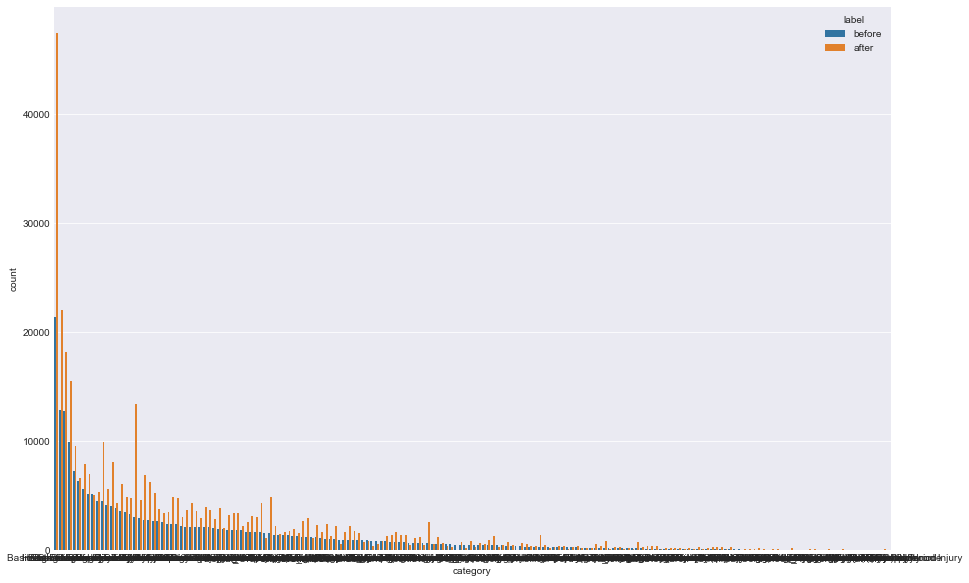

In [408]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x = "category", y = "count", hue = "label", data = category_counts_before_after)

In [372]:
category_counts_before_after = pd.concat([before_2003_category_counts, after_2003_category_counts], axis = 1).reset_index()
category_counts_before_after.columns = ["category", "before", "after"]

/Users/maheshrao/anaconda3/envs/capstone/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


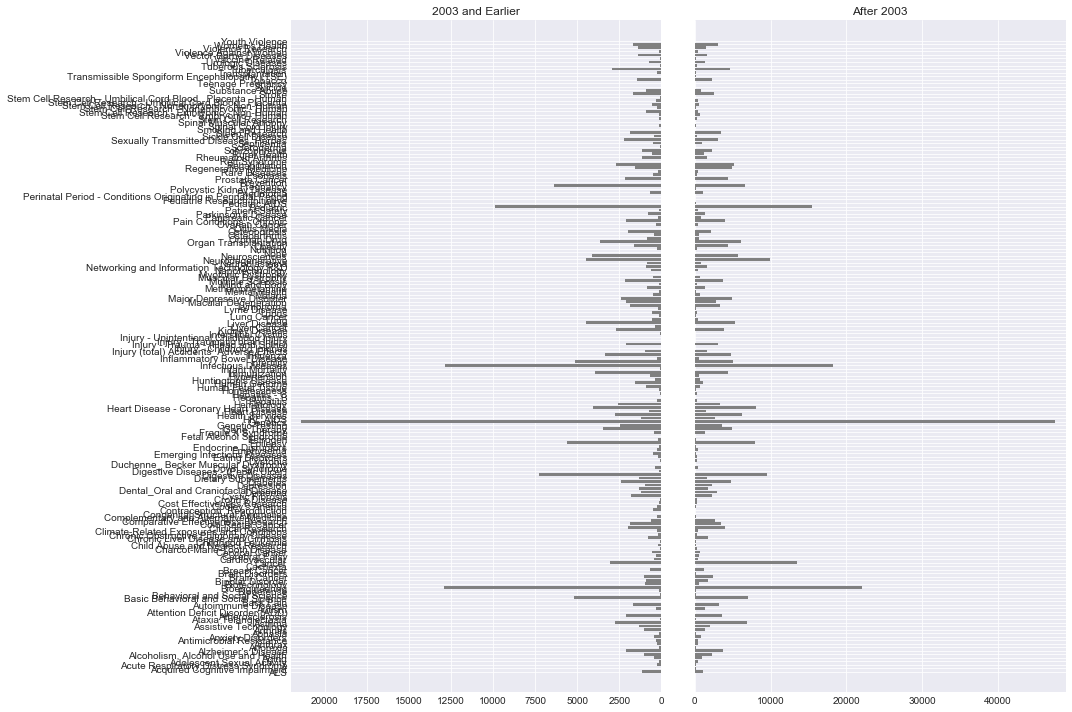

In [383]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(15, 10))
axes[0].barh(category_counts_before_after.category, category_counts_before_after.before, align='center', color='gray')
axes[0].set(title='2003 and Earlier')
axes[1].barh(category_counts_before_after.category, category_counts_before_after.after, align='center', color='gray')
axes[1].set(title='After 2003')

axes[0].invert_xaxis()
#axes[0].set(yticklabels=category_counts_before_after.category)
#axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.09)
plt.show()

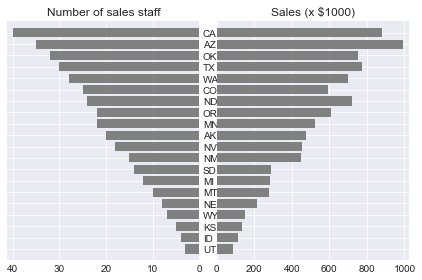

In [341]:
states = ["AK", "TX", "CA", "MT", "NM", "AZ", "NV", "CO", "OR", "WY", "MI",
          "MN", "UT", "ID", "KS", "NE", "SD", "WA", "ND", "OK"]
staff = np.array([20, 30, 40, 10, 15, 35, 18, 25, 22, 7, 12, 22, 3, 4, 5, 8,
                  14, 28, 24, 32])
sales = staff * (20 + 10 * np.random.random(staff.size))

# Sort by number of sales staff
idx = staff.argsort()
states, staff, sales = [np.take(x, idx) for x in [states, staff, sales]]

y = np.arange(sales.size)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, staff, align='center', color='gray', zorder=10)
axes[0].set(title='Number of sales staff')
axes[1].barh(y, sales, align='center', color='gray', zorder=10)
axes[1].set(title='Sales (x $1000)')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=states)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.09)
plt.show()